<center> <h2> DS 3000 - Fall 2021</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Uber And Lyft Price Determination in Boston</h3> </center>
<center><h4>Karen Cheng, Isabella Cho, Antonio Casceres</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Ridesharing apps such as uber and lyft have increased in popularity over the past couple of years. College students, especially in Boston, rely heavily on these apps. For this project, we looked at uber and lyft data in Boston and merged it with weather data to see what conditions affect the prices of rides. Price was our target variable and the features that appeared to have the biggest impact on price are temperature, rain, humidity, wind, and cab type(uber or lyft). Users of uber and lyft can use this information to determine the best time and conditions to order a reasonably priced ride. 


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION


<h4>Problem Statement</h4>


  We would like to see how price changes based on different factors such as time of day, weather conditions, etc. We are hoping to see which factors have the biggest influence of price and see if there is a major difference in price between both ridesharing apps. 


  For this project, we are looking at uber and lyft data in Boston and how price changes according to different factors. We will look at how features such as time, temperature, weather conditions, call location, or cab type can affect the price of a ride. Hopefully, we will be able to find out if there are certain conditions that affect the price more than others and how the price of a ride is determined.
  
  We want to gain insights on how weather can affect demand and pricing. Especially with different times of day and certain locations.  

<h4>Significance of the Problem</h4>

  We want to make it so that everyone can have insights to this type of data analysis. Especially with rideshare apps being not only students' main mode of transportation in the city, but also working adults. It will help to know when it would be more or less expensive to call an uber or lyft. Many college students in Boston rely on these apps. Throughout college, we have noticed significant changes in price and availability and it would be interesting to see what factors affect price.

  Users of these ride-sharing apps could use this information to see when it is the most optimal time and conditions to call a ride.



<h4>Questions</h4>

Given the aforementioned problem and its importance, we set out to tackle the following questions:
- Which factors affect price the most?
- Is there a big difference between the prices of ubers and lyfts?
- Does weather have a big impact on ride price?
- How can we accurately derive the price of a rideshare ride given weather and ride data?



<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition




Our original data is from an Uber and Lyft dataset in Kaggle. This data was collected in Boston. We merged the uber and lyft data with weather data that is also from Kaggle.
https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices?select=weather.csv

Independent Variables:
- Distance
- Cab Type
- Time
- Destination
- Source
- Surge Multiplier
- Wind
- Rain
- Temp
- Humidity

Dependent Variables:
- Price of ride

After cleaning our data we were left with 106329 data rows. We cleaned our data so it only included data from UberX and Lyft standard rides. Here is the link: https://colab.research.google.com/drive/1Q5Er68EsaW2Oxw-uECVc6FOIQ1m5zMRP?usp=sharing
 


In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/baron605/DS3000-Project/main/cab_weather.csv?token=AS67KEOODICWDEV3ELNN4MDBXTQCC")
data

,Unnamed: 0,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,wind,rain,temp,humidity,latitude,longitude
0,0,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,0.845098,2.807355,37.431399,0.753902,42.3661,-71.0330
1,1,1.08,Lyft,1.540000e+12,Northeastern University,Back Bay,7.0,1.0,d859ec69-b3ff-4af8-9abd-441e31430c94,lyft,Lyft,0.845098,2.807355,37.431399,0.753902,42.3503,-71.0810
2,2,1.11,Uber,1.540000e+12,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,0.875061,2.906891,38.758541,0.346635,42.3647,-71.0542
3,3,0.72,Lyft,1.550000e+12,Haymarket Square,North Station,7.0,1.0,5ef44fdf-c5d3-4d07-967a-a8710e537e74,lyft,Lyft,0.845098,2.807355,37.431399,0.753902,42.3661,-71.0631
4,4,2.48,Uber,1.540000e+12,South Station,Beacon Hill,8.5,1.0,4149295f-4534-4712-b2cf-160308528c75,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,0.929419,3.087463,41.166171,-0.602012,42.3647,-71.0542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106324,106324,1.81,Lyft,1.540000e+12,Beacon Hill,North End,9.0,1.0,dd63e380-e7f1-4cb8-a513-38e6290b2cf8,lyft,Lyft,0.954243,3.169925,42.265667,-0.911130,42.3647,-71.0542
106325,106325,3.11,Lyft,1.540000e+12,Fenway,Theatre District,10.5,1.0,aa4e5808-7357-49d3-b539-bd04d4815665,lyft,Lyft,1.021189,3.392317,45.230899,-0.475537,42.3647,-71.0542
106326,106326,0.91,Uber,1.540000e+12,Beacon Hill,Haymarket Square,7.0,1.0,aba6db9d-6b6f-4bb2-b9dd-2ceb1fbd1061,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,0.845098,2.807355,37.431399,0.753902,42.3647,-71.0542
106327,106327,1.61,Uber,1.540000e+12,Haymarket Square,Theatre District,15.0,1.0,54362c72-124b-47e8-8d07-62a07cfff624,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.176091,3.906891,52.091875,-0.759688,42.3503,-71.0810


### 2.2. Data Analysis

We are going to be predicting the price of a ride based on weather and ride feature variables. These will be important predictors because of the strong correlation weather data has on the price of a cab. As for qualitative data, determining the difference in lyft and uber prices will help us predict the overall price of using a specific ride share service. 
- This problem is a Supervised ML problem because we know both the price of a cab as well as its features, we ade just trying to find a way to correlate the two.Specifically, we are using Regression to find and utilize the strongest featurss in order to predict a price given a set of features. 
-  We are Using Linear Regression, Lasso, Ridge and Decision Tree. <br> There is a similar reason as to why we choxe linear, lasso and ridge Regression. Since we have already indetiifed that some of thr features have a correlation with our price target, it seems suitable to use these regressprs in order to indeifty which features work the best. Both Ridge and Lasso are regulalized linear regressions, their use in our project is if some features contain some discrepencies with the elasicity to price that affect our ML predictivness accuracy. We also added Decision Tree to provide some regressor that wasnt associated to Linear Regression. Decision Tree also works very well as it divides our data into a lot of subproblems to find the most accurate results. 



<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling


Remove Outliers and Fill Null Values

In [ ]:
# Remove outliers that create biases in our data set

cols = ["price"]  # one or more
Q1 = data["price"].quantile(0.25)
Q3 = data["price"].quantile(0.75)
IQR = Q3 - Q1

data_no_outliers = data[ ~((data["price"] < (Q1 - 1.5 * IQR)) | (data["price"] > (Q3 + 1.5 * IQR)))]
print(data.shape)
data_no_outliers.shape

(106329, 17)


(103353, 17)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

Deleting NA values

In [ ]:
#Drop Row if there is an NA in price
data.dropna(subset = ['price'], inplace=True)
 
# Replace Na with -1 in features 
data.fillna(-1, inplace = True)

#Fill weather null values 
#we are filling na values with the mean for our weather conditions so that we don't have to 
#delete any rows maintaining our dataset
data.rain = data.rain.fillna(data.rain.mean())

data.humidity = data.humidity.fillna(data.humidity.mean())

data.price = data.price.fillna(data.price.mean())

data.temp = data.temp.fillna(data.temp.mean())

data.wind = data.wind.fillna(data.wind.mean())

data.isnull().values.any()


False

One Hot Encoding: Dealing with Qualitative Data


In [ ]:
#split qualitative and quantitative data into separate dataframes
stringFeatureColumns = data[["destination", "source", "cab_type", "name"]]
remainingFC = data[['price', "distance", "time_stamp", "surge_multiplier", "temp", "rain", "humidity", "wind"]]


In [ ]:
#encode qualitative data columns
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)

encoded_df = encoder.fit_transform(stringFeatureColumns)
encoded_df

encoder.get_feature_names_out(["destination", "source", "cab_type", "name"])

array(['destination_Back Bay', 'destination_Beacon Hill',
       'destination_Boston University', 'destination_Fenway',
       'destination_Financial District', 'destination_Haymarket Square',
       'destination_North End', 'destination_North Station',
       'destination_Northeastern University', 'destination_South Station',
       'destination_Theatre District', 'destination_West End',
       'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'cab_type_Lyft',
       'cab_type_Uber', 'name_Lyft', 'name_UberX'], dtype=object)

In [ ]:
#put encoded data into a dataframe
features_df = pd.DataFrame(encoded_df, columns = encoder.get_feature_names_out(["destination", "source", "cab_type", "name"]))
features_df

,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,cab_type_Lyft,cab_type_Uber,name_Lyft,name_UberX
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
106325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
106326,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
106327,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
#rename Uber and Lyft columns to make data clearer, drop repetitive columns
features_df.rename(columns = {"name_UberX": "UberX", "name_Lyft" : "Lyft"}, inplace = True)
features_df.drop(columns = ["cab_type_Uber", "cab_type_Lyft"], inplace = True)
features_df

,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,Lyft,UberX
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
106325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
106326,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
106327,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#merge endcoded features to the remaining features
final_df = features_df.join(remainingFC, how="inner")
#drop remaining null valuews from final cleaned dataframe
final_df_nona = final_df.dropna()
final_df_nona


,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,Lyft,UberX,price,distance,time_stamp,surge_multiplier,temp,rain,humidity,wind
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.44,1.540000e+12,1.0,37.431399,2.807355,0.753902,0.845098
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,1.08,1.540000e+12,1.0,37.431399,2.807355,0.753902,0.845098
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.5,1.11,1.540000e+12,1.0,38.758541,2.906891,0.346635,0.875061
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.72,1.550000e+12,1.0,37.431399,2.807355,0.753902,0.845098
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.5,2.48,1.540000e+12,1.0,41.166171,3.087463,-0.602012,0.929419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,1.81,1.540000e+12,1.0,42.265667,3.169925,-0.911130,0.954243
106325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,10.5,3.11,1.540000e+12,1.0,45.230899,3.392317,-0.475537,1.021189
106326,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.91,1.540000e+12,1.0,37.431399,2.807355,0.753902,0.845098
106327,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,15.0,1.61,1.540000e+12,1.0,52.091875,3.906891,-0.759688,1.176091


Getting Feature and Target Values

In [ ]:
#set price as target variable and remaining data as feature set
df = final_df.rename(columns = {"price": "target"})

def features_and_target(df):
    df_tuple_features = df.drop("target", axis = 1)
    df_target = df["target"]
    
    return(df_tuple_features, df_target)

features, target = features_and_target(df)
features
target


0          7.0
1          7.0
2          7.5
3          7.0
4          8.5
          ... 
106324     9.0
106325    10.5
106326     7.0
106327    15.0
106328     9.5
Name: target, Length: 106329, dtype: float64

In [ ]:
#PREPROCESSING: use min-max scaler to scale the data
def scale_the_dataset():        
    '''function: scale the dataset for use in ML algorithms '''
    
    #create the scaler
    scaler = MinMaxScaler()

    #fit scaler to training data
    scaler.fit(features) 
    scaled_features = scaler.transform(features)
  
    return scaled_features

In [ ]:
scaled_features = scale_the_dataset()

Split Data into Training and Testing

Perform Feature Selection

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, random_state=3000)

#define a selection method and specify the score function to be f_regression
select = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 5)
select.fit(X_train, y_train)

#transform training and testing sets so only the selected features are retained
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

In [ ]:
#display selected features 
col_select = select.get_support(indices = True)
col_keep = features.columns[col_select]
for i in col_keep:
        print("\t",i)
 

	 UberX
	 temp
	 rain
	 humidity
	 wind


### 3.2. Data Exploration



The visualization below is a lineplot of price versus distance. The key and line colors represent cab type, either lyft or uber. This graph shows that there is a positive correlation between price and distance for both cab types. The independent variable is distance and price is the dependent variable. It seems like price is pretty similar for both cab types but there is a spike where uber is significantly higher in price around 5 miles. 

Text(0.5, 1.0, 'Price vs Distance According to Cab Type')

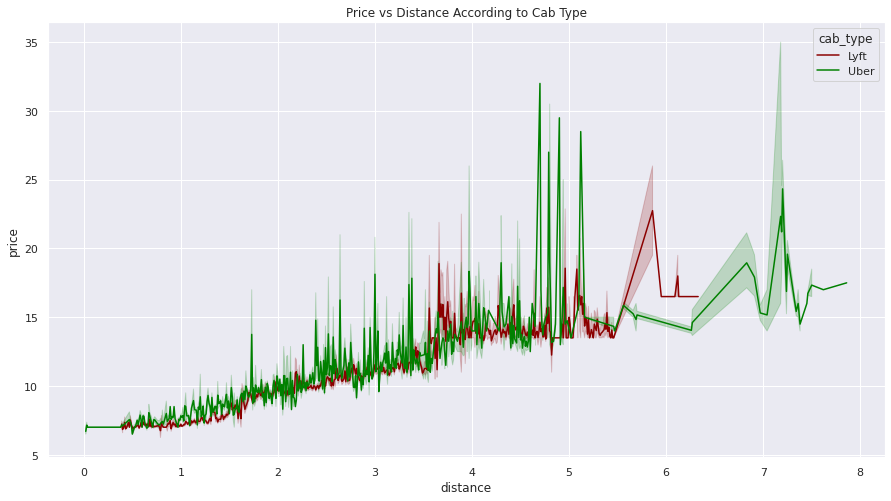

In [ ]:
import seaborn as sns
plt = sns.lineplot(data=data, x='distance', y='price', hue='cab_type', palette=['darkred', 'green'])
sns.set(rc = {'figure.figsize':(15,8)})

plt.set_title('Price vs Distance According to Cab Type')


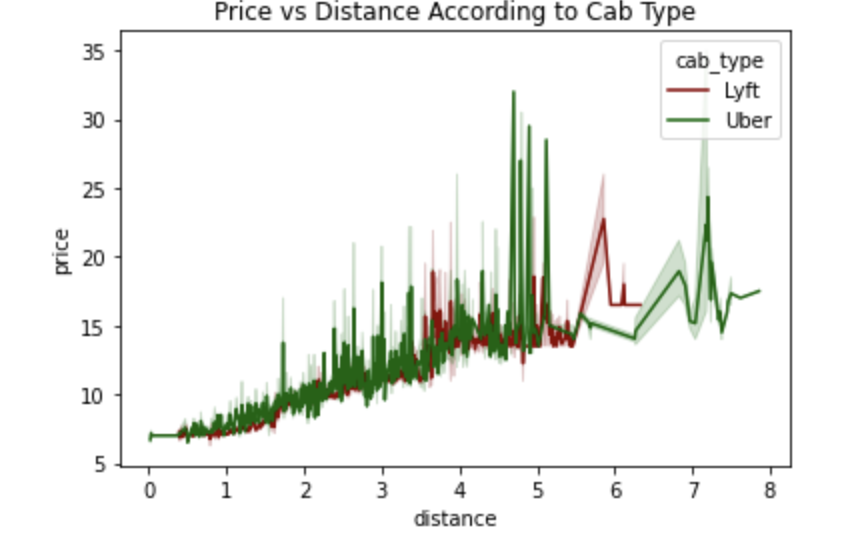

The visualization below is a bar plot of the top 5 most frequent traveled routes versus the least traveled routes. Traveled routes meaning the count of how many times a car was called from a source to a destination. In this bar plot we can see that the most traveled route is from the Financial District to South Station. The least traveled route is from the West End to the North end. 




In [ ]:
import plotly.express as px
pair_features = data.groupby(["source", "destination"]).size().reset_index()
pair_features.columns = ["source", "destination", "count"]
pair_features["TravelRoute"] = (pair_features["source"] + " to  " + 
                                       pair_features["destination"])

df_top = pair_features.nlargest(5, 'count')
df_top.reset_index(inplace = True)


df_bottom = pair_features.nsmallest(5, 'count')
df_bottom.reset_index(inplace = True)

df = df_top.append(df_bottom).reset_index()
df.drop(columns = ["level_0"], inplace = True)
df

graph = px.bar(df, x = df["TravelRoute"], y = df["count"], template = "ggplot2", color = df["count"] , height=500
, title="Top 5 Travel Routes and Bottom 5 Travel Routes for Uber and Lyft")


graph.update_layout(showlegend=False)

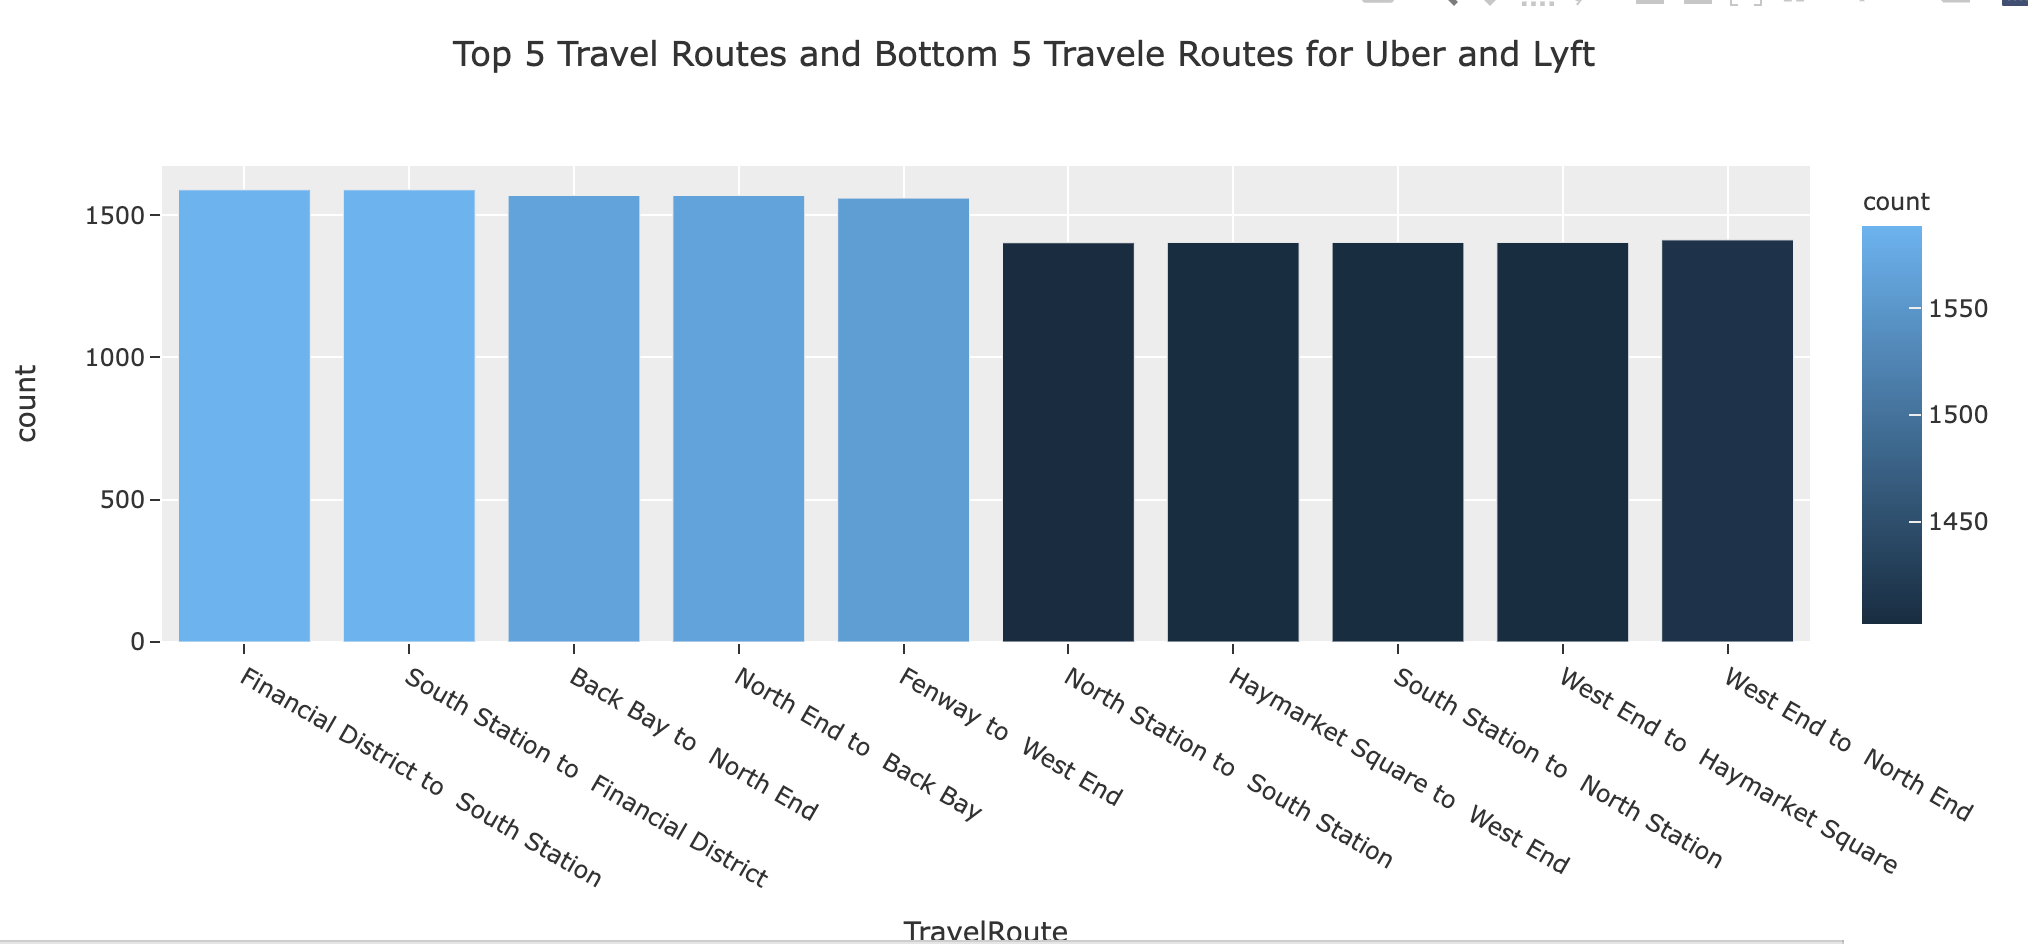

The visualization below is a violin plot representing the prices of rides. The independent variable along the x-axis is the cab type, uber or lyft. The dependent variable along the y-axis is price. Overall, there was no major difference between uber and lyft prices but there were higher priced uber rides included in the dataset. 


Text(0.5, 1.0, 'Lyft Vs Uber Prices')

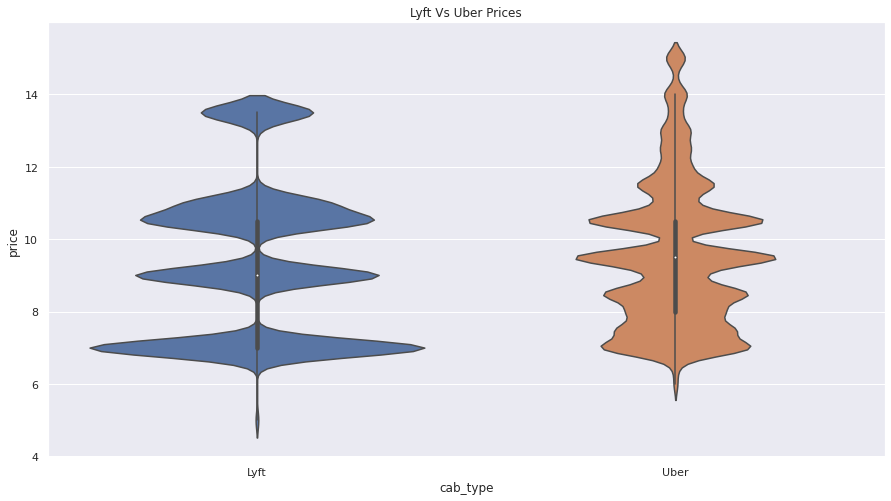

In [ ]:
import seaborn as sns
sns.violinplot(x='cab_type',y='price', data=data_no_outliers).set_title(
    "Lyft Vs Uber Prices")


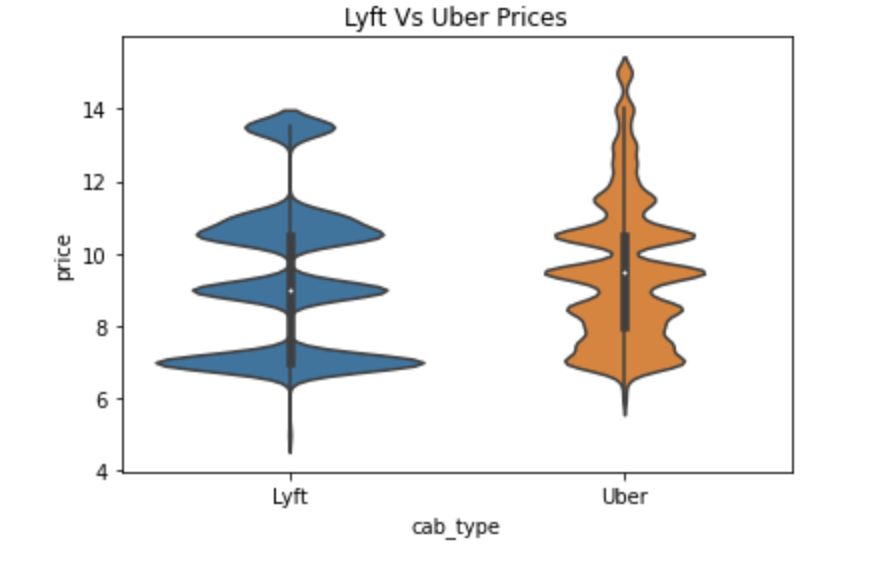

### 3.3. Model Training


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
estimators = {"Linear Regression":LinearRegression(), "Lasso":Lasso(),
               'Ridge': Ridge(),
              "Decision Tree" : DecisionTreeRegressor()}
estimators.values()

dict_values([LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor()])

In [ ]:
def regressors_percentage_split():
    # answer goes here
    from sklearn.metrics import r2_score
    for estimator_name, estimator_object in estimators.items():
        estimator = estimator_object.fit(X=X_train_selected, y=y_train)
        print(estimator_name + ": \n\tR-squared value for training set: ", r2_score(y_train, estimator.predict(X_train_selected)))
        print("\tR-squared value for testing set: ", r2_score(y_test, estimator.predict(X_test_selected)), "\n")
        
regressors_percentage_split()

Linear Regression: 
	R-squared value for training set:  0.9685215073742425
	R-squared value for testing set:  0.9685221871485704 

Lasso: 
	R-squared value for training set:  0.0
	R-squared value for testing set:  -8.607510685543218e-06 

Ridge: 
	R-squared value for training set:  0.9684040175540083
	R-squared value for testing set:  0.9682595394256075 

Decision Tree: 
	R-squared value for training set:  1.0
	R-squared value for testing set:  0.9999983526688893 



### 3.4. Model Optimization


Why we chose Lasso : <br>
 As you can see from the results of the testing the different regressors, Lasso seemed like the odd one out. Linear Regression, Ridge were both very well fit, with a bit of it spilling into over fitting. Decision Tree seemed extreemly overfitted. We looked at Lasso, which logically shouldn't be much different than Linear Regression or Ridge, should produce at least competititve results. However, from the analysis, it seemed like a big alpha for this Regressor created severe underfitting



In [ ]:
# param_grid = {'alpha':[.001, .01, .1, 1, 10, 100]}
from scipy.stats import uniform
r = uniform.rvs(0,2,size=100)
param_grid = {"alpha":r}

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# import GridSearchCV and fit GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, random_state=3000)

#fit the grid search object on the training data (CV will be performed on this)
grid_search.fit(X=X_train_selected, y=y_train)

# result of grid search
print("Best estimator: ", grid_search.best_estimator_)
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# the performance of the best found parameters on the test set
# this is what you report for the evaluation of your model
print("Test set score: ", grid_search.score(X_test_selected, y_test))


Best estimator:  Lasso(alpha=0.003711318961475474)
Best parameters:  {'alpha': 0.003711318961475474}
Best cross-validation score:  0.9622018721781546
Test set score:  0.9618424464023283


### 3.5. Model Testing


In [ ]:

#function that iterates over several ML algorithms and finds their percentage-split
    
model = grid_search.fit(X=X_train_selected, y=y_train)


R_train = r2_score(y_train, model.predict(X_train_selected))
R_test = r2_score(y_test, model.predict(X_test_selected))  
MSE_train = mean_squared_error(y_train, model.predict(X_train_selected))
MSE_test = mean_squared_error(y_test, model.predict(X_test_selected))

print("\tR-squared value for training set: ", round(R_train,4))
print("\tR-squared value for testing set: ", round(R_test,4))
print("\tMSE value for training set: ", round(MSE_train,4))
print("\tMSE value for testing set: ", round(MSE_test,4))






	R-squared value for training set:  0.9622
	R-squared value for testing set:  0.9618
	MSE value for training set:  0.236
	MSE value for testing set:  0.2374


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
We compared Linear Regression, Ridge and Lasso Regression, and DecsionTreeRegressor. The algorithm that revelead the best performance was Lasso Regression as the Decision was very overfitted. We recommend using any variant of the Linear Regression such as Ridge, Lasso, or Multiple Linear Regression as it does not overfit the data as much. The parameters that worked the best for the Lasso Regressor was an alpha level of approximately .0068. This was also paired up with the selected features found with our feature engineering which were the following : Whether the cab was an Uber, temp, rain, humidity and, wind (AKA Weather Data). Our findings show that weather data provides the most insight in predicting price. Qualitative variables, such as source, destination and type of cab did contribute to the predictiveness of our model but not nearly as much as overall weather data. 
- The ethical implications of our project are whether uber/lyft gives a fair price based on the conditions. Our results should not be entirely accepted at face value because there are so many other variables that can greatly affect the price of a ride on a day-to-day and even hour-to-hour basis. For example, variables such as the amount of available drivers at a given time and location can greatly affect prices for a short span of time. These results should give us insight into how weather and other qualitative data affects the price of our rideshare apps on a macro, or general level. 
- Some pointers for future work could be to see how much the time of day affects our rideshare app prices as well as how fair the prices we are given really are. As mentioned prior, while weather and other data can affect the amount of riders available it could also be important to collect data in order to assist in predicting prices in immediate situations.

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">